# Q1- [25 pts]

Load the data from the provided .csv file into a pandas dataframe, it contains a list of 1200 bitstrings which each have a length of 16 bits. Call the dataset S. We call two bitstrings A and B equivalent (A∼B) if you can flip one bit at a time starting from A to produce a sequence of strings A,s1,s2,...,sn,B∈S that are all within the dataset to get the string B. Through this notion of equivalence, we may define an equivalence relation on this set of bit strings. Using agglomerative clustering with a tolerance on distance for early stopping, we can compute the number of equivalence classes by counting the number of clusters. In order to do this, which linkage rule should be used (single-linkage, complete-linkage, or average-linkage), which distance function should be used (Euclidiean distance, Manhattan distance, or cosine distance), and what should the threshold distance be? Explain why you would pick these parameters.

Allowed libraries: sklearn, matplotlib, pandas, numpy

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


S = pd.read_csv('../datasets/bitstrings.csv')
S.head()


,0,0.1,0.2,0.3,0.4,0.5,1,1.1,0.6,1.2,1.3,1.4,1.5,1.6,0.7,0.8
0,0,0,0,0,0,0,1,1,0,0,1,1,1,1,0,0
1,0,0,0,0,0,0,0,1,0,0,1,1,1,1,0,0
2,0,0,0,0,0,0,1,1,0,0,1,1,1,1,0,0
3,0,0,0,0,0,1,1,1,0,0,1,1,1,1,0,0
4,0,0,0,0,1,1,1,1,0,0,1,1,1,1,0,0


#### I think for this question we need to use the minimum distance between elements of each cluster, which is single-linkage rule clustering. (Single-linkage)

#### In my opinion neither of Euclidiean distance, Manhattan distance, or cosine distance could be used for differentiating given bitstrings. All these types of distances are calculated between TWO points. I believe that for this type of problem I need to use Hamming Distance, which literally shows the amount of bit change between two bitstrings. Despite this in Q2 I will use Manhattan distance because I cannot choose Hamming for Q2 and Manhattan distance will work for this kind of queston. (Manhattan Distance)

#### In order to merge the equivalent bitstrings into a cluster, I need to be able to find a bitstring from a cluster such that the Hamming Distance between this bitstring and the observed one is equal to ONE. If the threshould will be 1 then the algorithm won't include the right bitstring into the cluster, so the threshould should be TWO. (2)

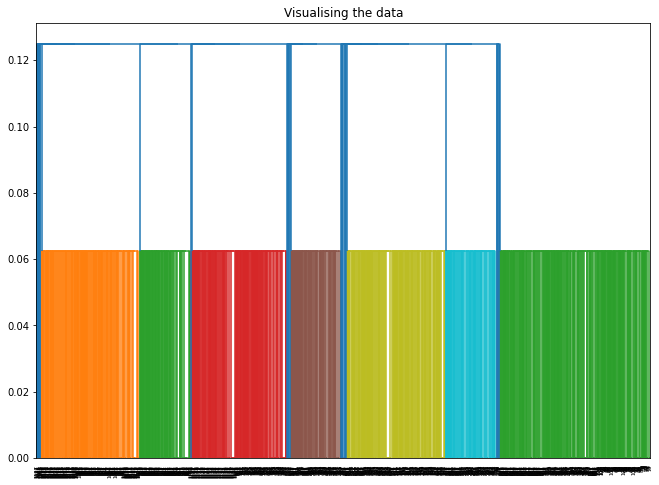

In [182]:
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

plt.figure(figsize =(11, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(S, method ='single', metric='hamming')))

# Q2- [25 pts]

Perform the clustering using the parameters you picked in Q1. How many equivalence classes (clusters) are there? Create a bar plot, showing the number of strings in each cluster. (You may need to increase your distance threshold slightly if you don't want the algorithm to terminate when the distance is equal to the threshold.)

<AxesSubplot:ylabel='Frequency'>

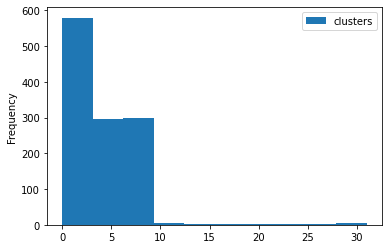

In [183]:
import matplotlib.pyplot as plt

cluster = AgglomerativeClustering(n_clusters=None, affinity='manhattan', linkage='single', distance_threshold=2)
cluster.fit_predict(S)
pd.DataFrame({'clusters': cluster.labels_}).plot.hist()

32 clusters are generated

# Q3- [10 pts]

Using this clustering, determine if 0000001101111100∼1011101101111101. What about 1001111011001001∼1001111011000000? (You need to show that you used this clustering to determine the answer).



In [184]:
# concatenate the string to ease the solution
S=S.astype('string')
S['whole'] = S['0'] + S['0.1'] + S['0.2'] + S['0.3'] + S['0.4'] + S['0.5'] + S['1'] + S['1.1'] + S['0.6'] + S['1.2'] + S['1.3'] + S['1.4'] + S['1.5'] + S['1.6'] + S['0.7'] + S['0.8']	

In [185]:
# this function finds the indices of the given bitstrings in the modified S
# it compares the cluster labels and prints appropriate outputs
def compareBitstrings(bitstring_1, bitstring_2):
    if (cluster.labels_[int(S[S['whole']==bitstring_1].index[0])] ==
    cluster.labels_[int(S[S['whole']==bitstring_2].index[0])]):
        print("The bitstrings", bitstring_1,"and", bitstring_2 , "ARE equivalent!")
        print("They both belong to the cluster:", cluster.labels_[int(S[S['whole']==bitstring_1].index[0])])
    else:
        print("The bitstrings", bitstring_1,"and", bitstring_2 , "are NOT equivalent!")
        print(bitstring_1, "belongs to cluster:", cluster.labels_[int(S[S['whole']==bitstring_1].index[0])])
        print(bitstring_2, "belongs to cluster:", cluster.labels_[int(S[S['whole']==bitstring_2].index[0])])


In [186]:
compareBitstrings('0000001101111100', '1011101101111101')
print('\n')
compareBitstrings('1001111011001001', '1001111011000000')

The bitstrings 0000001101111100 and 1011101101111101 ARE equivalent!
They both belong to the cluster: 7


The bitstrings 1001111011001001 and 1001111011000000 are NOT equivalent!
1001111011001001 belongs to cluster: 5
1001111011000000 belongs to cluster: 25


# Q4- [20 pts]

Redo the clustering on the dataset, but this time using both of the other linkage rules (keep everything else the same), and report the number of clusters for both. Is there any difference from the number of clusters you found in Q2? If so, explain why.

In [187]:
# update S, it was modified in the last question
S = pd.read_csv('../datasets/bitstrings.csv')

cluster_complete_link = AgglomerativeClustering(n_clusters=None, affinity='manhattan', linkage='complete', distance_threshold=2)
cluster_complete_link.fit_predict(S)

cluster_average_link = AgglomerativeClustering(n_clusters=None, affinity='manhattan', linkage='average', distance_threshold=2)
cluster_average_link.fit_predict(S)
print("Complete Linkage:", np.unique(cluster_complete_link.labels_).shape[0], "clusters")
print("Average Linkage:", np.unique(cluster_average_link.labels_).shape[0], "clusters")


Complete Linkage: 618 clusters
Average Linkage: 190 clusters


There is a difference in the number of clusters for the other linkage types. 

Complete Linkage produces the most amount of clusters because it considers equivalent those values which have the maximum distance between each other. In addition, small threshold contributes to this number of cluster. The maximal difference is almost always greater than 2.

Average Linkage produces a smaller amount of clusters because it calculates the mean distance between all elements. The mean is smaller than the maximum that is why we see less clusters. There are more bitstrings with mean distance between them less than 2. 


# Q5- [20 pts]

Cluster the dataset again, this time using K-means clustering with the number of clusters set to the number you found in Q2. Create a bar plot for the size of the clusters. Compare with your plot in Q2, how do these results differ? Give an explanation for this difference.

<AxesSubplot:ylabel='Frequency'>

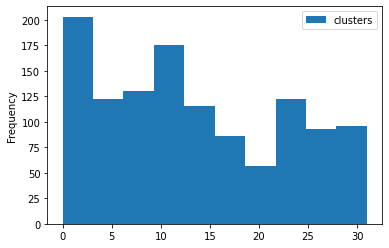

In [206]:
from sklearn.cluster import KMeans

# instansiate a KMeans object with number of clusters from Q2
kmeans = KMeans(n_clusters=np.unique(cluster.labels_).shape[0]) 
kmeans.fit(S)
pd.DataFrame({'clusters': kmeans.labels_}).plot.hist()


Agglomerative and K-means clustering definitely produced different results. Agglomerative clustering clustered the big amount of the values into 10 clusters. On the other hand, K-means distributed the bitstrings between all the clusters more uniformly.

Agglomerative clustering started from the bottom and considered each sample as a separate cluster and then the algorithm looked at other samples and compared the distances with the threshold. By choosing correct parameters agglomarative clustering does a great job.  

KMeans chooses 32 random points and starts from them as separate classes. It includes the closest points to each created cluster from the start. The results are always different beacuse of the non-determenistic behaviour of the algorithm.